# LOADING ALL REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.linear_model import LogisticRegression

# IMPORTING DATASET

In [3]:
hr = pd.read_excel("D:\\Files\\R Project Ideas and Datasets\\projectassignment\\HR.xlsx")
hr.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


# DATA_INSPECTION

In [4]:
hr.dtypes

Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer       float64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  int64  
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

In [6]:
hr.describe()

,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,1.233300e+04,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000


In [7]:
hr["Location"].value_counts().to_frame().transpose()

,Chennai,Noida,Bangalore,Hyderabad,Mumbai,Gurgaon,Kolkata,Coimbatore,Pune,Others,Cochin,Ahmedabad
Location,4289,3898,2865,505,251,189,143,87,76,15,8,7


# I WANT TO VIEW ALL COLUMNS VALUE COUNTS THE FOLLOWING CODE WILL BE HELPFUL

In [8]:
hr_obj = hr.select_dtypes(include = "object")
hr_obj.dtypes

DOJ Extended                 object
Offered band                 object
Joining Bonus                object
Candidate relocate actual    object
Gender                       object
Candidate Source             object
LOB                          object
Location                     object
Status                       object
dtype: object

In [9]:
# for i in hr_obj.columns:
#     print(hr_obj[i].value_counts().to_frame().transpose(),"\n","\n")

In [10]:
for i in hr_obj.columns:
    display(hr_obj[i].value_counts().to_frame().transpose())

,No,Yes
DOJ Extended,7259,5074


,E1,E2,E0,E3,E4,E5,E6
Offered band,6996,3458,1058,690,106,23,2


,No,Yes
Joining Bonus,11800,533


,No,Yes
Candidate relocate actual,10703,1630


,Male,Female
Gender,10047,2286


,Direct,Agency,Employee Referral
Candidate Source,7075,3170,2088


,INFRA,ERS,BFSI,ETS,BSERV,CSMP,AXON,EAS,CORP,Healthcare,SALES,MMS
LOB,3474,3089,1743,954,797,693,659,439,210,172,85,18


,Chennai,Noida,Bangalore,Hyderabad,Mumbai,Gurgaon,Kolkata,Coimbatore,Pune,Others,Cochin,Ahmedabad
Location,4289,3898,2865,505,251,189,143,87,76,15,8,7


,Joined,Not Joined
Status,8725,3608


In [11]:
# for i in hr_obj.columns:
#     display(hr_obj[i].value_counts().to_frame())

# NAN VALUES CHECK

In [12]:
hr.isna().sum()

Candidate Ref                     0
DOJ Extended                      0
Duration to accept offer       2719
Notice period                     0
Offered band                      0
Pecent hike expected in CTC     747
Percent hike offered in CTC     596
Percent difference CTC          851
Joining Bonus                     0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
Rex in Yrs                        0
LOB                               0
Location                          0
Age                               0
Status                            0
dtype: int64

In [13]:
hr["Duration to accept offer"].median(skipna = True)

9.0

In [14]:
x = [2,5,6,7]
for i in x:
    display(hr.columns[i],hr.iloc[:,i].median(skipna = True))


'Duration to accept offer'

9.0

'Pecent hike expected in CTC'

38.89

'Percent hike offered in CTC'

34.48

'Percent difference CTC'

0.0

# DATA CLEANING

In [15]:

### As I Want to replace NA's and Negative with that column central value 
## So i'm replacing that negative values to NA's
### Columns 2,5,6 and 7 are having Negative Values


In [16]:
hr.columns

Index(['Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [17]:
hr[hr['Duration to accept offer'] < 0]

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
49,2233690,No,-1.0,90,E1,-11.11,-11.11,0.00,No,No,Male,Employee Referral,2,INFRA,Gurgaon,26,Joined
298,3225493,No,-1.0,30,E2,241.67,150.00,-26.83,No,No,Male,Direct,20,AXON,Chennai,62,Not Joined
880,2176933,No,-1.0,30,E1,-4.00,-4.00,0.00,No,No,Female,Direct,2,INFRA,Noida,25,Joined
1187,2206905,Yes,-29.0,45,E1,NaN,NaN,NaN,No,Yes,Female,Employee Referral,4,ERS,Noida,27,Joined
1245,2211046,No,-1.0,90,E1,47.83,47.83,0.00,Yes,No,Male,Direct,3,Healthcare,Bangalore,28,Joined
1395,2219238,No,-1.0,0,E2,87.50,87.50,0.00,No,Yes,Male,Direct,7,INFRA,Noida,46,Joined
1527,2224341,Yes,-24.0,0,E1,NaN,NaN,NaN,No,Yes,Male,Direct,4,ERS,Hyderabad,31,Joined
1736,2243610,No,-1.0,0,E2,28.57,28.57,0.00,No,Yes,Male,Employee Referral,8,INFRA,Noida,29,Joined
2178,2284083,No,-1.0,30,E1,20.00,32.00,10.00,No,No,Male,Agency,2,INFRA,Noida,21,Joined
2180,2284089,No,-1.0,30,E2,25.00,25.00,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,38,Joined


# CONVERTING NEGATIVE VALUES TO NAN

In [18]:
x = [2,5,6]
for i in x:
    hr[hr.columns[i]] = hr[hr.columns[i]].apply(lambda x: np.nan if x < 0 else x)


In [19]:
hr[hr.columns[7]][2214]

-37.89

In [20]:
hr.iloc[:,2].median()

9.0

# FILLING NAN WITH MEDIAN VALUE

In [21]:
for i in x:
    hr[hr.columns[i]].fillna(value = hr.iloc[:,i].median(),inplace = True)


In [22]:
hr[hr.columns[2]][880]

9.0

# CORRECTING COLUMN 7

In [23]:
hr.columns

Index(['Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [24]:
hr['Percent difference CTC'] = hr['Percent hike offered in CTC'] - hr['Pecent hike expected in CTC']


In [25]:
hr.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,39.53,13.16,-26.37,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,270.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


# REMOVING THE COLUMN CANDIDATE REF WHICH IS UNIMPORTANT 

In [26]:
hr.drop(columns = ["Candidate Ref"],axis = 1,inplace = True)

In [27]:
hr_obj.head

<bound method NDFrame.head of       DOJ Extended Offered band Joining Bonus Candidate relocate actual  \
0              Yes           E2            No                        No   
1               No           E2            No                        No   
2               No           E2            No                        No   
3               No           E2            No                        No   
4              Yes           E2            No                       Yes   
...            ...          ...           ...                       ...   
12328           No           E0            No                        No   
12329           No           E0            No                        No   
12330           No           E2            No                        No   
12331           No           E1            No                        No   
12332           No           E1            No                        No   

       Gender   Candidate Source    LOB Location  Status  
0      Fem

In [28]:
# hr_num = hr.select_dtypes(exclude="object")

In [29]:
# hr_num

# WE ARE READY WITH DATA AND WE WILL PERFORM LOGISTIC REGRESSION 

In [30]:
hr.Status.value_counts()

Joined        8725
Not Joined    3608
Name: Status, dtype: int64

In [31]:
hr

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14.0,30,E2,39.53,13.16,-26.37,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18.0,30,E2,50.00,320.00,270.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12329,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34,Joined
12330,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,Joined
12331,No,0.0,30,E1,76.92,53.85,-23.07,No,No,Male,Direct,4,INFRA,Noida,34,Joined


In [32]:
hr.Status = hr.Status.map({"Joined":0,"Not Joined":1})

In [33]:
hr

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,Yes,14.0,30,E2,39.53,13.16,-26.37,No,No,Female,Agency,7,ERS,Noida,34,0
1,No,18.0,30,E2,50.00,320.00,270.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,0
2,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,0
3,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,0
4,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34,0
12329,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34,0
12330,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34,0
12331,No,0.0,30,E1,76.92,53.85,-23.07,No,No,Male,Direct,4,INFRA,Noida,34,0


In [34]:
hr.columns

Index(['DOJ Extended', 'Duration to accept offer', 'Notice period',
       'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [35]:
x = hr[['DOJ Extended', 'Duration to accept offer', 'Notice period',
       'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age']]

In [36]:
y = hr["Status"]

In [37]:
x

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
0,Yes,14.0,30,E2,39.53,13.16,-26.37,No,No,Female,Agency,7,ERS,Noida,34
1,No,18.0,30,E2,50.00,320.00,270.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34
2,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27
3,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34
4,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34
12329,No,9.0,0,E0,47.54,42.86,-4.68,No,No,Male,Direct,0,BSERV,Chennai,34
12330,No,0.0,0,E2,35.42,35.42,0.00,No,No,Male,Direct,5,INFRA,Noida,34
12331,No,0.0,30,E1,76.92,53.85,-23.07,No,No,Male,Direct,4,INFRA,Noida,34


In [38]:
x = pd.get_dummies(x)
x

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,DOJ Extended_No,DOJ Extended_Yes,Offered band_E0,...,Location_Chennai,Location_Cochin,Location_Coimbatore,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14.0,30,39.53,13.16,-26.37,7,34,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,18.0,30,50.00,320.00,270.00,8,34,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3.0,45,42.84,42.84,0.00,4,27,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,26.0,30,42.84,42.84,0.00,4,34,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,120,42.59,42.59,0.00,6,34,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12328,9.0,0,47.54,42.86,-4.68,0,34,1,0,1,...,1,0,0,0,0,0,0,0,0,0
12329,9.0,0,47.54,42.86,-4.68,0,34,1,0,1,...,1,0,0,0,0,0,0,0,0,0
12330,0.0,0,35.42,35.42,0.00,5,34,1,0,0,...,0,0,0,0,0,0,0,1,0,0
12331,0.0,30,76.92,53.85,-23.07,4,34,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# TRAIN_TEST_SPLIT

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7)

In [41]:
x_train.shape

(8633, 49)

In [42]:
x_test.shape

(3700, 49)

In [43]:
y_train.shape

(8633,)

In [44]:
y_test.shape

(3700,)

In [45]:
log_reg = LogisticRegression()

In [46]:
log_reg.fit(x_train,y_train)

C:\Users\aakas\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_test = y_test.reset_index(drop=True)


In [48]:
y_test

0       0
1       1
2       0
3       0
4       0
       ..
3695    1
3696    1
3697    1
3698    0
3699    0
Name: Status, Length: 3700, dtype: int64

In [49]:
 y_pred = pd.Series(log_reg.predict(x_test))

In [50]:
y_test

0       0
1       1
2       0
3       0
4       0
       ..
3695    1
3696    1
3697    1
3698    0
3699    0
Name: Status, Length: 3700, dtype: int64

In [51]:
z = pd.concat([y_test,y_pred],axis=1)

In [52]:
z.columns

Index(['Status', 0], dtype='object')

In [53]:
z.columns = ["Actual","Predicted"]

In [54]:
z

,Actual,Predicted
0,0,1
1,1,0
2,0,0
3,0,1
4,0,1
...,...,...
3695,1,0
3696,1,0
3697,1,0
3698,0,0


In [55]:
from sklearn import metrics

In [56]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2660
           1       0.60      0.41      0.48      1040

    accuracy                           0.76      3700
   macro avg       0.70      0.65      0.66      3700
weighted avg       0.74      0.76      0.74      3700



In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

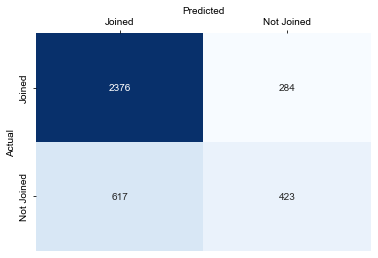

In [58]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="Blues",annot=True,fmt="d",cbar=False)
ax.set_xlabel("Predicted");ax.set_ylabel("Actual")
# plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Joined","Not Joined"]);ax.yaxis.set_ticklabels(["Joined","Not Joined"],va  = "center")
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
ax.yaxis.tick_left()
sns.set(font_scale=1.3)

In [59]:
# ax = plt.subplot()
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="ocean",annot=True,fmt="d",cbar=False)
# ax.set_xlabel("Predicted");ax.set_ylabel("Actual")
# # plt.title("Confusion Matrix")
# ax.xaxis.set_ticklabels(["Joined","Not Joined"]);ax.yaxis.set_ticklabels(["Joined","Not Joined"],va = "center")
# ax.xaxis.set_label_position("top");ax.xaxis.tick_top();ax.yaxis.tick_left()
# # plt.yticks()
# # ax.set_yticklabels(labels = ["Joined","Not Joined"] ,minor=True)
# sns.set(font_scale=1.2)

In [60]:
# ax = plt.subplot()
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt="d",cbar=False)
# ax.set_xlabel("Predicted");ax.set_ylabel("Actual")
# ax.xaxis.set_label_position("top");
# ax.xaxis.tick_top();ax.yaxis.tick_left()
# ax.xaxis.set_ticklabels(["Joined","Not Joined"]);ax.yaxis.set_ticklabels(["Joined","Not Joined"],va = "center")
# sns.set(font_scale=1.5)


In [61]:
# fig,(ax1,ax2) = plt.subplots(1,2)
# fig.set_size_inches(15,5)
# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="Blues",annot=True,fmt="d",cbar=False,ax=ax1)
# ax1.set_xlabel("Predicted");ax1.set_ylabel("Actual")
# # plt.title("Confusion Matrix")
# ax1.xaxis.set_ticklabels(["Joined","Not Joined"]);ax1.yaxis.set_ticklabels(["Joined","Not Joined"])
# ax1.xaxis.set_label_position("top")
# ax1.xaxis.tick_top()

# sns.heatmap(metrics.confusion_matrix(y_test,y_pred),cmap="ocean",annot=True,fmt="d",cbar=False,ax= ax2)
# ax2.set_xlabel("Predicted");ax2.set_ylabel("Actual")
# # plt.title("Confusion Matrix")
# ax2.xaxis.set_ticklabels(["Joined","Not Joined"]);ax2.yaxis.set_ticklabels(["Joined","Not Joined"],va = "center")
# ax2.xaxis.set_label_position("top");ax2.xaxis.tick_top();ax2.yaxis.tick_left()


In [62]:
hr.Location.value_counts()

Chennai       4289
Noida         3898
Bangalore     2865
Hyderabad      505
Mumbai         251
Gurgaon        189
Kolkata        143
Coimbatore      87
Pune            76
Others          15
Cochin           8
Ahmedabad        7
Name: Location, dtype: int64

In [63]:
loc = ["Chennai",     
"Noida",         
"Bangalore",     
"Hyderabad",     
"Mumbai" ,       
"Gurgaon" ,      
"Kolkata"  ,
"Coimbatore"  ,  
"Pune"         , 
"Others"       ,
"Cochin"     ,
"Ahmedabad"]

In [74]:
import geocoder
lt = []
lg = []
for i in range(len(loc)):
    lt.append(geocoder.osm(loc[i]).json["lat"])
    lg.append(geocoder.osm(loc[i]).json["lng"])

In [75]:
# lt

In [76]:
# lg

In [77]:
direc = pd.concat([pd.Series(lt),pd.Series(lg)],axis=1)
direc.columns = ["Lat","Lng"]
direc

,Lat,Lng
0,13.080172,80.283833
1,28.572644,77.354761
2,12.979120,77.591300
3,17.388786,78.461065
4,18.938771,72.835335
5,28.428262,77.002700
6,22.545412,88.356775
7,11.001812,76.962842
8,18.521428,73.854454
9,14.168827,121.241537


In [78]:
lat = []
lng = [] 
for a in range(1):
    lat.append(hr.Location.replace( { loc[a]:direc.Lat[a],loc[a+1]:direc.Lat[a+1],loc[a+2]:direc.Lat[a+2],loc[a+3]:direc.Lat[a+3]
                               ,loc[a+4]:direc.Lat[a+4],loc[a+5]:direc.Lat[a+5],loc[a+6]:direc.Lat[a+6]
                               ,loc[a+7]:direc.Lat[a+7],loc[a+8]:direc.Lat[a+8],loc[a+9]:direc.Lat[a+9],loc[a+10]:direc.Lat[a+10],loc[a+11]:direc.Lat[a+11] }     ))
    lng.append(hr.Location.replace( { loc[a]:direc.Lng[a],loc[a+1]:direc.Lng[a+1],loc[a+2]:direc.Lng[a+2],loc[a+3]:direc.Lng[a+3]
                               ,loc[a+4]:direc.Lng[a+4],loc[a+5]:direc.Lng[a+5],loc[a+6]:direc.Lng[a+6]
                               ,loc[a+7]:direc.Lng[a+7],loc[a+8]:direc.Lng[a+8],loc[a+9]:direc.Lng[a+9],loc[a+10]:direc.Lng[a+10],loc[a+11]:direc.Lng[a+11]}     ))
    
    
#       lng = hr.Location.replace({loc[i]:direc.Lng[i]})

In [79]:
lat

[0        28.572644
 1        13.080172
 2        28.572644
 3        28.572644
 4        28.572644
            ...    
 12328    13.080172
 12329    13.080172
 12330    28.572644
 12331    28.572644
 12332    13.080172
 Name: Location, Length: 12333, dtype: float64]

In [80]:
lng

[0        77.354761
 1        80.283833
 2        77.354761
 3        77.354761
 4        77.354761
            ...    
 12328    80.283833
 12329    80.283833
 12330    77.354761
 12331    77.354761
 12332    80.283833
 Name: Location, Length: 12333, dtype: float64]

In [81]:
Lat = pd.DataFrame(lat).transpose()
Lng = pd.DataFrame(lng).transpose()
Lat.columns = ["Lat"]
Lng.columns = ["Lng"]

In [82]:
hr["Lat"] = Lat
hr["Lng"] = Lng
hr.head(10)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,Lat,Lng
0,Yes,14.0,30,E2,39.53,13.16,-26.37,No,No,Female,Agency,7,ERS,Noida,34,0,28.572644,77.354761
1,No,18.0,30,E2,50.00,320.00,270.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,0,13.080172,80.283833
2,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,0,28.572644,77.354761
3,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,0,28.572644,77.354761
4,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,0,28.572644,77.354761
5,Yes,17.0,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,0,28.572644,77.354761
6,Yes,37.0,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,0,28.572644,77.354761
7,No,9.0,45,E2,40.00,208.64,168.64,No,No,Male,Employee Referral,4,INFRA,Noida,34,1,28.572644,77.354761
8,Yes,16.0,0,E1,39.53,36.84,-2.69,No,No,Female,Direct,8,Healthcare,Noida,34,0,28.572644,77.354761
9,No,9.0,30,E1,1.00,36.84,35.84,No,No,Male,Direct,4,ERS,Noida,34,1,28.572644,77.354761


In [85]:
import plotly_express as px
fig = px.density_mapbox(hr,lat="Lat",lon="Lng",height=700,zoom=3.55,animation_frame="LOB",radius=5,hover_name="Location")
fig.update_layout(mapbox_style = "open-street-map")
fig.show()

In [ ]:
l1 = []
l2 = [] 
for a in range(1):
    lat.append(hr.Location.replace( { loc[a]:direc.Lat[a]}))                         
    lng.append(hr.Location.replace( { loc[a]:direc.Lng[a]}))
    
    
#       lng = hr.Location.replace({loc[i]:direc.Lng[i]})

In [86]:
hr.iterrows()

<generator object DataFrame.iterrows at 0x00000211F6810B48>

In [95]:
df = pd.DataFrame([[1, 1.5]], columns=['int', 'float'])
row = next(df.iterrows())[1]
row

int      1.0
float    1.5
Name: 0, dtype: float64